In [1]:
import numpy as np
import cv2
import cv2 as cv
import matplotlib.pyplot as plt

## Method 1

### Apply gaussianBlur (Horizontal and vertical) -> Take difference of both gaussian from image -> adjust gamma -> equalize

(-0.5, 614.5, 148.5, -0.5)

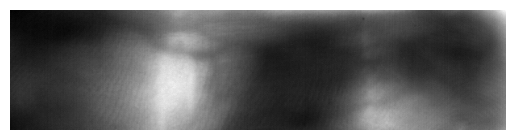

In [2]:
img = cv.imread('images/FV_base_cropped.png')
img = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.axis('off')

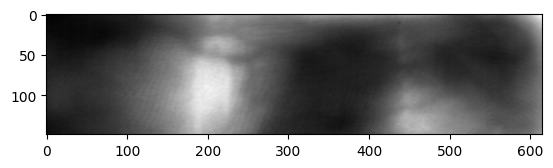

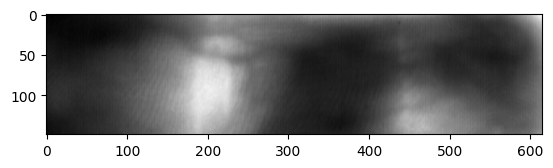

In [3]:
# Removes fingerprint data
gaussian_img1 = cv.GaussianBlur(img.copy(), (img.shape[0], 1), 1)

plt.imshow(gaussian_img1, cmap='gray')
plt.show()

gaussian_img2 = cv.GaussianBlur(img.copy(), (1, img.shape[1]), 1)

plt.imshow(gaussian_img2, cmap='gray')
plt.show()

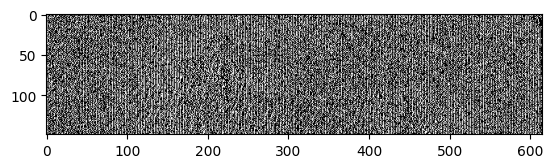

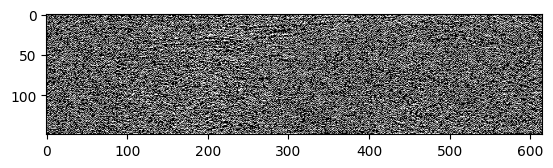

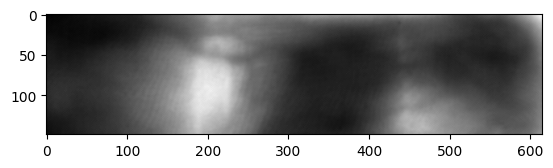

In [11]:
diff1 = np.abs(img-gaussian_img1)
diff2 = np.abs(img-gaussian_img2)

plt.imshow(diff1, cmap='gray')
plt.show()
plt.imshow(diff2, cmap='gray')
plt.show()

new_gauss_img = np.abs( img - (diff1 + diff2) )
plt.imshow(new_gauss_img, cmap='gray')

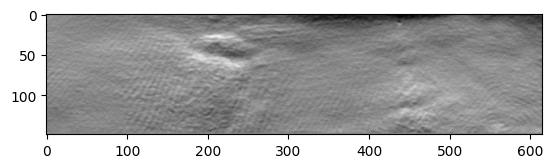

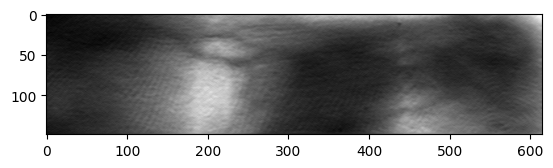

In [12]:
# sobel_img = cv.Sobel(new_gauss_img.copy(), ddepth=cv.CV_16S, dx=0, dy=1, ksize=3)
# plt.imshow(sobel_img, cmap='gray')
# plt.show()

# sobel_diff = np.abs(new_gauss_img - sobel_img)

# plt.imshow(sobel_diff, cmap='gray')
# plt.show()

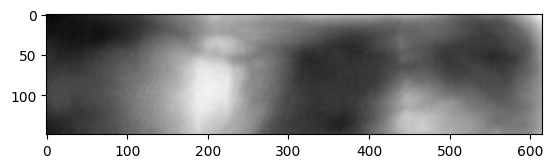

In [13]:
gamma_adjust_img = np.array(255*(new_gauss_img.copy()/255)**0.2, dtype='uint8')
plt.imshow(gamma_adjust_img, cmap='gray')

Text(0.5, 1.0, 'Preprocessed Image histogram')

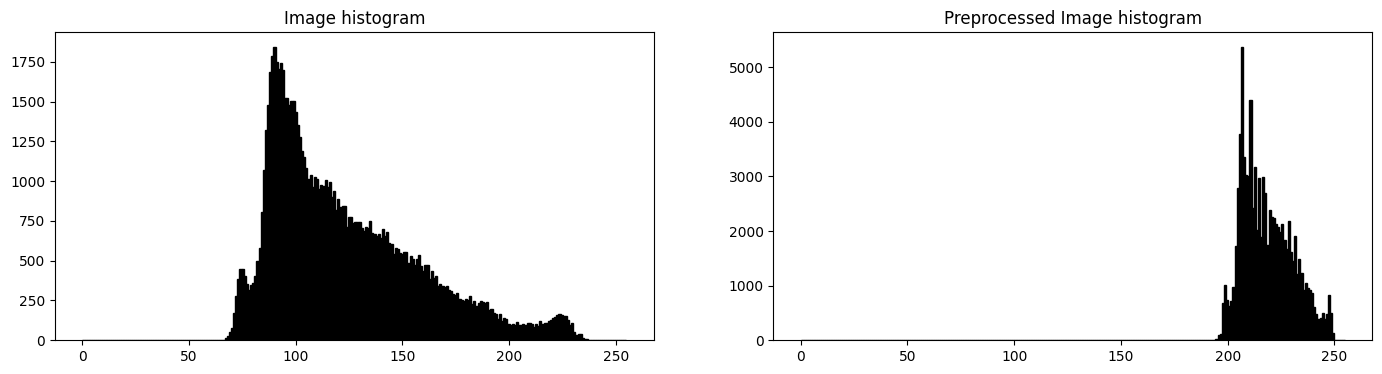

In [14]:
plt.figure(figsize=(17,4))
plt.subplot(121)
val = plt.hist(img.ravel(), bins=256, range=(0, 255), fc='k', ec='k') 
plt.title('Image histogram')

plt.subplot(122)
val = plt.hist(gamma_adjust_img.ravel(), bins=256, range=(0, 255), fc='k', ec='k') 
plt.title('Preprocessed Image histogram')

In [15]:
equalized_img = cv.equalizeHist(gamma_adjust_img)

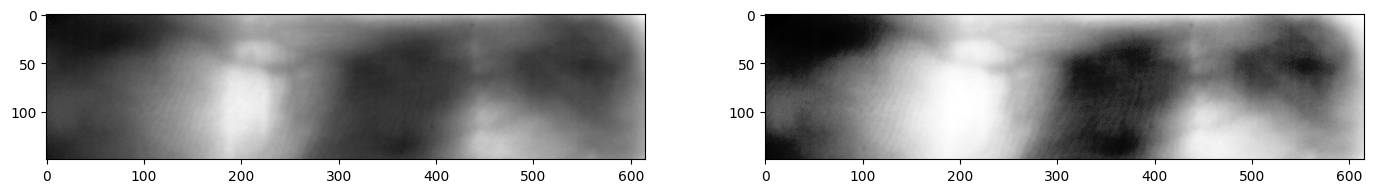

In [16]:
plt.figure(figsize=(17,4))
plt.subplot(121)
val = plt.imshow(gamma_adjust_img, cmap='gray')

plt.subplot(122)
val = plt.imshow(equalized_img, cmap='gray')

Text(0.5, 1.0, 'Equalized Preprocessed Image histogram')

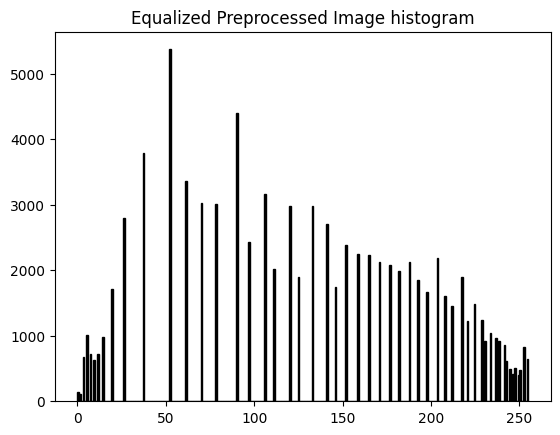

In [17]:
val = plt.hist(equalized_img.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Preprocessed Image histogram')

## Method 2

### CLAHE

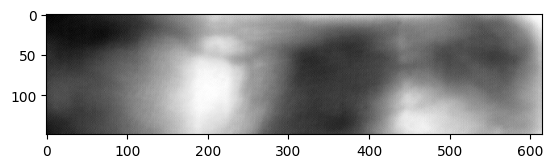

In [820]:
gb_img = np.array(gamma_adjust_img, dtype='uint8')

# gb_img = cv2.medianBlur(gb_img, 3)
# plt.imshow(gb_img, cmap='gray')
# plt.show()

clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(3,1))

CLAHEoutput = clahe.apply(gb_img)

plt.imshow(CLAHEoutput, cmap='gray')

In [756]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img1 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img1)

ValueError: not enough values to unpack (expected 3, got 1)

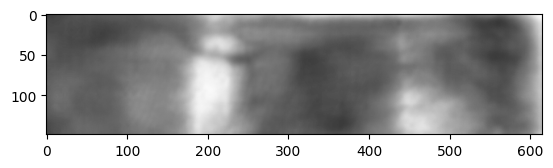

In [11]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img2 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img2)

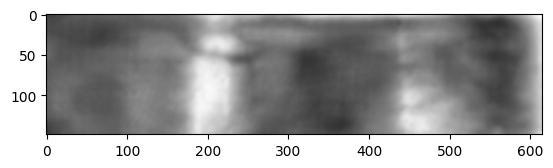

In [12]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img3 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img3)

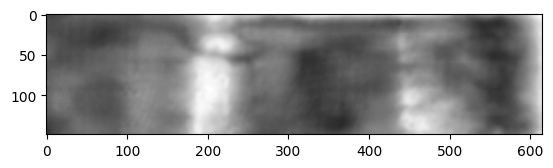

In [13]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img4 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img4)

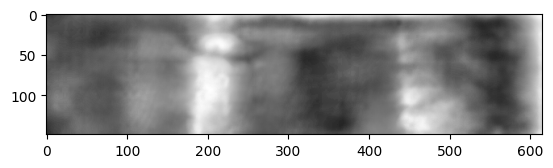

In [14]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img5 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img5)

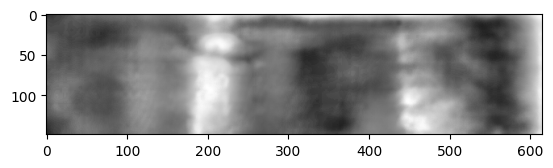

In [15]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=6, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img6 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img6)

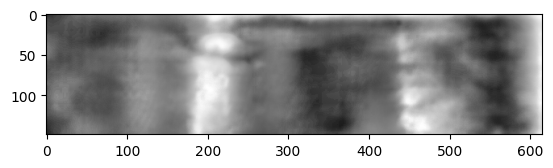

In [16]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img7 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img7)

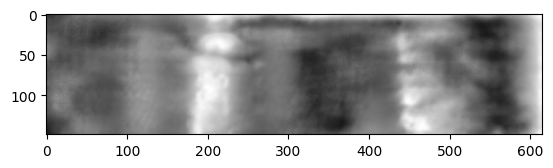

In [17]:
gb_img = np.array(img, dtype='uint8')

gb_img = cv2.GaussianBlur(gb_img, (7,7), sigmaX=3)
# plt.imshow(gb_img)

clahe = cv2.createCLAHE(clipLimit=8, tileGridSize=(9,9))

R, G, B = cv2.split(gb_img)
CLAHEoutput_R = clahe.apply(R)
CLAHEoutput_G = clahe.apply(G)
CLAHEoutput_B = clahe.apply(B)

cl_img8 = cv2.merge((CLAHEoutput_R, CLAHEoutput_G, CLAHEoutput_B))

plt.imshow(cl_img8)

(-0.5, 614.5, 148.5, -0.5)

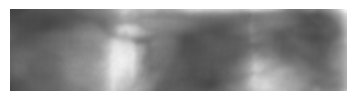

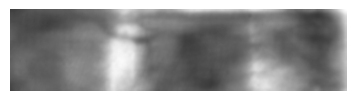

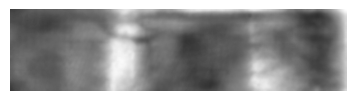

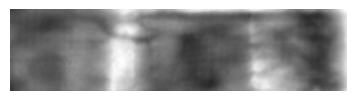

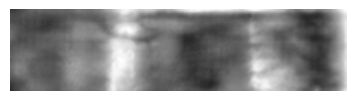

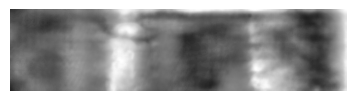

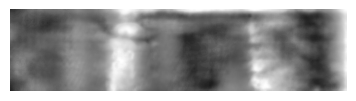

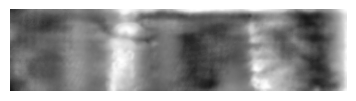

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(241)
plt.imshow(cl_img1)
plt.axis('off')

plt.figure(figsize=(20,5))
plt.subplot(242)
plt.imshow(cl_img2)
plt.axis('off')

plt.figure(figsize=(20,5))
plt.subplot(243)
plt.imshow(cl_img3)
plt.axis('off')

plt.figure(figsize=(20,5))
plt.subplot(244)
plt.imshow(cl_img4)
plt.axis('off')

plt.figure(figsize=(20,5))
plt.subplot(245)
plt.imshow(cl_img5)
plt.axis('off')

plt.figure(figsize=(20,5))
plt.subplot(246)
plt.imshow(cl_img6)
plt.axis('off')

plt.figure(figsize=(20,5))
plt.subplot(247)
plt.imshow(cl_img7)
plt.axis('off')

plt.figure(figsize=(20,5))
plt.subplot(248)
plt.imshow(cl_img8)
plt.axis('off')

(array([3.300e+01, 0.000e+00, 1.200e+02, 0.000e+00, 9.000e+00, 2.010e+02,
        0.000e+00, 5.730e+02, 5.880e+02, 8.730e+02, 0.000e+00, 1.764e+03,
        1.602e+03, 0.000e+00, 1.929e+03, 1.683e+03, 1.509e+03, 0.000e+00,
        2.106e+03, 2.316e+03, 0.000e+00, 3.081e+03, 3.384e+03, 4.290e+03,
        0.000e+00, 4.182e+03, 3.516e+03, 0.000e+00, 4.104e+03, 3.801e+03,
        4.488e+03, 0.000e+00, 3.723e+03, 3.711e+03, 0.000e+00, 3.936e+03,
        4.017e+03, 4.515e+03, 0.000e+00, 4.956e+03, 4.407e+03, 0.000e+00,
        3.996e+03, 4.395e+03, 0.000e+00, 4.164e+03, 4.593e+03, 4.305e+03,
        0.000e+00, 3.417e+03, 3.531e+03, 0.000e+00, 3.381e+03, 3.276e+03,
        2.901e+03, 0.000e+00, 3.003e+03, 2.721e+03, 0.000e+00, 2.652e+03,
        2.658e+03, 2.742e+03, 0.000e+00, 3.033e+03, 2.991e+03, 0.000e+00,
        2.874e+03, 2.625e+03, 2.655e+03, 0.000e+00, 2.808e+03, 2.853e+03,
        0.000e+00, 2.667e+03, 2.979e+03, 2.868e+03, 0.000e+00, 3.096e+03,
        3.363e+03, 0.000e+00, 3.030e+0

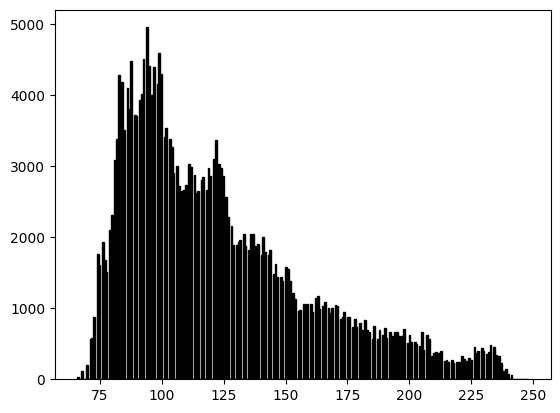

In [19]:
plt.hist(cl_img1.ravel(), bins=256, fc='k', ec='k')


In [20]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(src=cl_img1, ddepth=-1, kernel=kernel)
cv2.imshow('AV CV- Winter Wonder Sharpened', image_sharp)

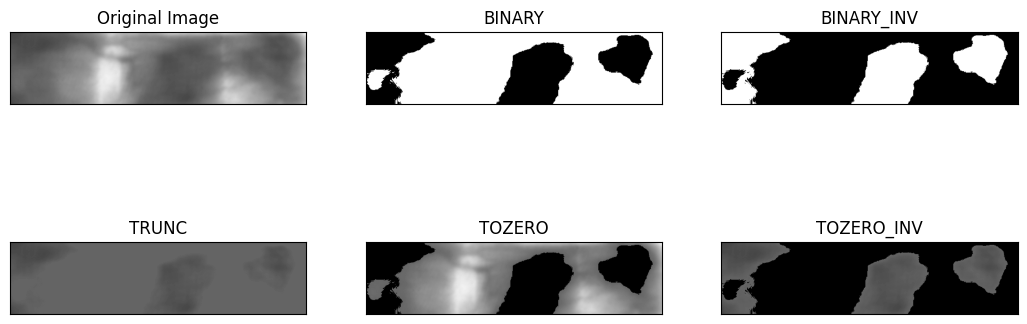

In [21]:
gray_img = cv2.cvtColor(cl_img1, cv2.COLOR_RGB2GRAY)

ret,thresh1 = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(gray_img, 100, 255, cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(gray_img, 100, 255, cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(gray_img, 100, 255, cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray_img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(13,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## Thresholding

In [25]:
gray_img = cv2.cvtColor(cl_img1, cv2.COLOR_RGB2GRAY)

ret,thresh1 = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(gray_img, 127, 255, cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(gray_img, 127, 255, cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(gray_img, 127, 255, cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

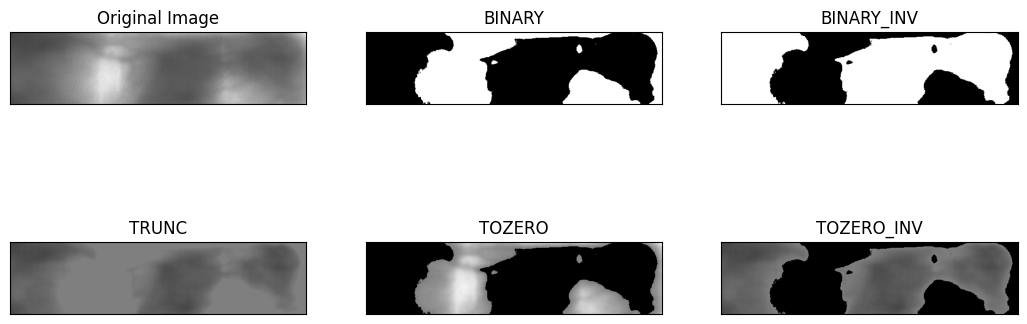

In [26]:
plt.figure(figsize=(13,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## Method 3

### Trying new stuff

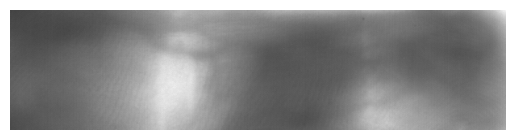

(149, 615, 3)

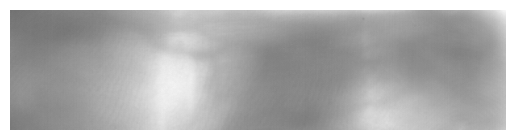

In [280]:
img = cv.imread('images/FV_base_cropped.png')
# img = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = np.array(255*(img/255)**0.6, dtype='uint8')
plt.imshow(img, cmap='gray')
plt.axis('off')

img.shape

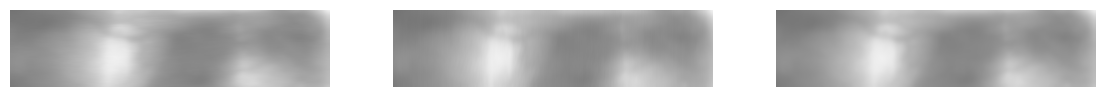

(-0.5, 614.5, 148.5, -0.5)

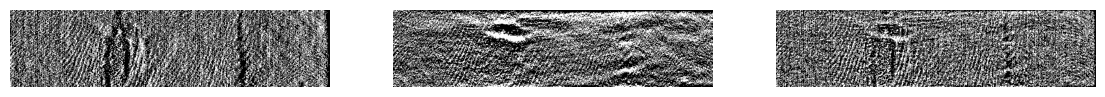

In [331]:
# Removes fingerprint data
gaussian_img1 = cv.GaussianBlur(img.copy(), (img.shape[0], 1), 5)

gaussian_img2 = cv.GaussianBlur(img.copy(), (1, img.shape[1]), 5)

gaussian_img3 = cv.GaussianBlur(img.copy(), (11, 11), 5)

plt.figure(figsize=(14,4))

plt.subplot(131)
plt.imshow(gaussian_img1)
plt.axis('off')

plt.subplot(132)
plt.imshow(gaussian_img2)
plt.axis('off')

plt.subplot(133)
plt.imshow(gaussian_img3)
plt.axis('off')

plt.show()



diff1 = np.abs(img-gaussian_img1)
diff2 = np.abs(img-gaussian_img2)
diff3 = np.abs(img-gaussian_img3)

plt.figure(figsize=(14,4))

plt.subplot(131)
plt.imshow(diff1)
plt.axis('off')
# plt.show()

plt.subplot(132)
plt.imshow(diff2)
plt.axis('off')

plt.subplot(133)
plt.imshow(diff3)
plt.axis('off')

# plt.show()

(-0.5, 614.5, 148.5, -0.5)

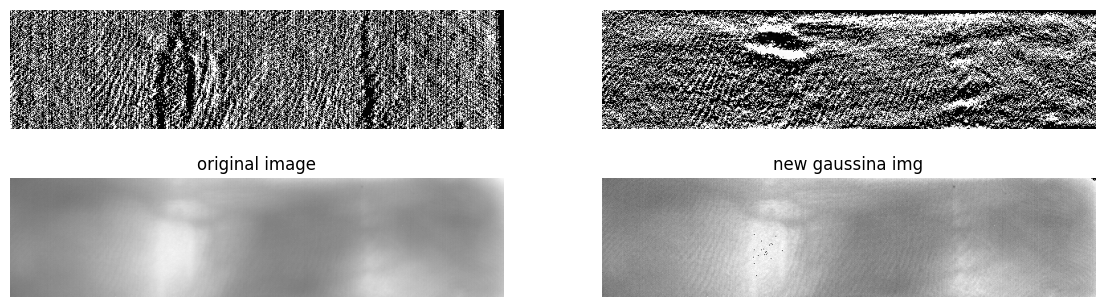

In [348]:
alpha, beta, gamma = 1, 1, 1

new_gauss_img = np.abs( img + (np.abs(alpha*diff1) + (beta*diff2) + (gamma*diff3)) )

plt.figure(figsize=(14,4))

plt.subplot(221)
plt.imshow(alpha*diff1)
plt.axis('off')
# plt.show()

plt.subplot(222)
plt.imshow(beta*diff2)
plt.axis('off')
# plt.show()

plt.subplot(223)
plt.imshow(img)
plt.title('original image')
plt.axis('off')

plt.subplot(224)
plt.imshow(np.uint8(new_gauss_img))
plt.title('new gaussina img')
plt.axis('off')

In [ ]:
lap_img = cv.cvLaplace()

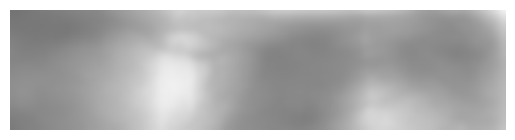

(-0.5, 614.5, 148.5, -0.5)

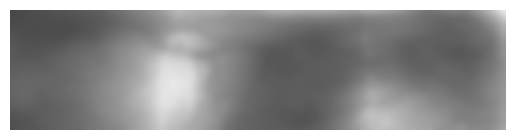

In [333]:
plt.imshow(gaussian_img3)
plt.axis('off')
plt.show()

gas_img_tmp = np.array(255*(gaussian_img3.copy()/255)**1.6, dtype='uint8')
plt.imshow(gas_img_tmp)
plt.axis('off')

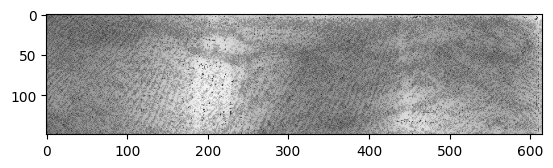

In [334]:
gamma_adjust_img = np.array(255*(new_gauss_img/255)**0.9, dtype='uint8')
plt.imshow(gamma_adjust_img)

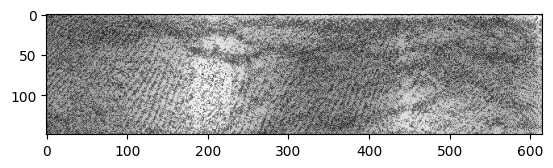

In [335]:
diff = np.abs(gamma_adjust_img - img)
plt.imshow(img + (2*diff))